# Task 1

#### In this task, in order to work on classes easily, tha data is separated as data of class A and data of class B. They are imported to the code seperately. 

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import PCA


Adata= pd.read_csv("IE582_Fall21_HW2_q1_dataOfA.csv")
Bdata= pd.read_csv("IE582_Fall21_HW2_q1_dataOfB.csv")


#print(Adata)
#print(Bdata)

Ay = Adata.pop('class') 
By = Bdata.pop('class')


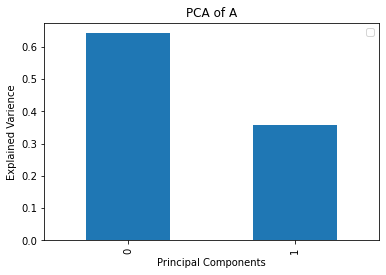

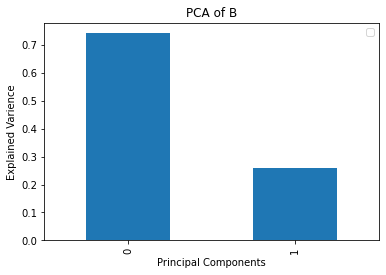

In [2]:
pca = PCA()
Adata_pca = pd.DataFrame(pca.fit_transform(Adata))
Adata_pca2= np.round(Adata_pca,5)

import matplotlib.pyplot as plt
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.title('PCA of A')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');


Bdata_pca = pd.DataFrame(pca.fit_transform(Bdata))
Bdata_pca2= np.round(Bdata_pca,5)

pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.title('PCA of B')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');



Adata_pca2['class'] = Ay
Bdata_pca2['class'] = By


#print(Adata_pca2)
#print(Bdata_pca2)

##### These results show that the first principal component covers 65% information for class A and 75% information for class B. Therefore, the dimension is reduced to 1 with respect to these principal components for classes. 

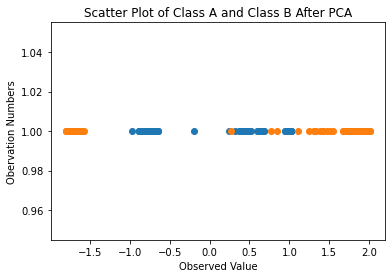

In [3]:
groupA = Adata_pca2.groupby([0]).size()
#print(groupA)
groupB = Bdata_pca2.groupby([0]).size()

xA=[]
yA=[]
xB=[]
yB=[]

for i, v in groupA.iteritems():
    xA.append(i)
    yA.append(v)

    
for i, v in groupB.iteritems():
    xB.append(i)
    yB.append(v)

fig, ax = plt.subplots()
ax.scatter(xA,yA)
ax.scatter(xB,yB)
plt.title("Scatter Plot of Class A and Class B After PCA")
plt.xlabel("Observed Value")
plt.ylabel("Obervation Numbers")
plt.show()


#### Note that the blue points represent Class A and the orange points represent Class B.

## b)

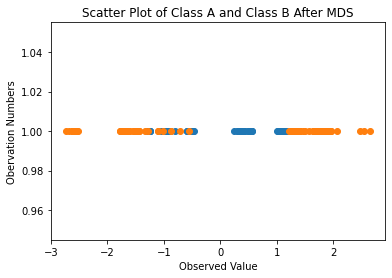

In [4]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.manifold import MDS
from matplotlib import pyplot as plt


Adata= pd.read_csv("IE582_Fall21_HW2_q1_dataOfA.csv")
Bdata= pd.read_csv("IE582_Fall21_HW2_q1_dataOfB.csv")


#print(Adata)
#print(Bdata)

Ay = Adata.pop('class') 
By = Bdata.pop('class')

mds = MDS(n_components=1,random_state=0)
Adata_transformed = mds.fit_transform(Adata)
Adata_mds=np.round(Adata_transformed,5)
#print(Adata_mds)

mds = MDS(n_components=1,random_state=0)
Bdata_transformed = mds.fit_transform(Bdata)
Bdata_mds=np.round(Bdata_transformed,5)
#print(Bdata_mds)

xA, yA = np.unique(Adata_mds, return_counts=True)
xB, yB = np.unique(Bdata_mds, return_counts=True)

fig, ax = plt.subplots()
ax.scatter(xA,yA)
ax.scatter(xB,yB)
plt.title("Scatter Plot of Class A and Class B After MDS")
plt.xlabel("Observed Value")
plt.ylabel("Obervation Numbers")
plt.show()

## c)

1) When we do a pca operation on class a and class b, the data is compressed only on one dimension. It can be seen that blue points which represent class A lies between -1 and 1, and the orange points lies between -2 and 2. Since we don't change the poisiton of the points but we change the analytical system to read them and remove one axis which has less information, these results make sense for pca since they look like circles.
    
2) MDS tries to find unique points for each of the datum point. MDS finds new position using points' distances to each other and tries to protect that information therefore we see that the points has more variance compared to the results in pca.
    
3) As it can be seen from the graph of MDS, the blue and orange points exceeds the limits of the ones in pca. This is because MDS finds new position using points' distances to each other and tries to protect that information. Whereas, pca just changes the analytical system and removes one dimension. Moreover, since the information is protected in the variance data for dimensionality reduction, for these data (since data points located somehow circular) mds gives better information compared to pca method.
        

# Task 2

In [5]:
import pandas as pd
from sklearn.manifold import MDS
from matplotlib import pyplot as plt

In [6]:
#distancedata = pd.read_excel (r'ilmesafe.xls')
#print (df)
distancedata = pd.read_excel (r'ildata.xlsx')

citynames = distancedata.pop('city')
upper_dist = np.triu(distancedata, k=1)
#print(upper_dist)
lower_dist = np.tril(distancedata, k=0)
#print(lower_dist) 


DISTANCE = np.maximum( upper_dist, upper_dist.transpose() )
#print(DISTANCE)


mds = MDS(random_state=0)
DISTANCE_transformed = mds.fit_transform(DISTANCE)
#print(DISTANCE_transformed)


C:\Users\EnesSari\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:441: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


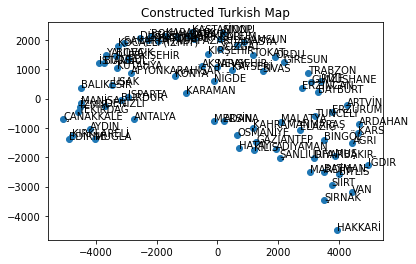

In [7]:
x = DISTANCE_transformed[:,1] 
y = DISTANCE_transformed[:,0]



fig, ax = plt.subplots()
ax.scatter(x,y)
for i, txt in enumerate(citynames):
    ax.annotate(txt, (x[i], y[i]))

plt.title("Constructed Turkish Map")

plt.show()

Although the map is not exactly the same as the real one, but overall it looks similar. 
It can be seen that the position of cities are relatively correct. 
For example; Hakkari, Şırnak, Van are at the right place compared to the real map.
Moreover, Trabzon, Antalya or Mersin are properly positioned compared to the real map.

## Task 3

In [9]:
import pandas as pd
import numpy as np
dataX = open('uWaveGestureLibrary_X_TRAIN','r')
dataX = dataX.readlines()
#print(dataX[0])

listX =[]

for i in dataX:
    #i.split(' ')[2:]
    listX.append(i.split(' ')[2:])

len(listX[1])

Columns=[]
for i in range(0,563,1):
    c='t='+ str(i)
    Columns.append(c)
#print(Columns)
dfX = pd.DataFrame(listX, columns=Columns)


dfX.to_csv('testX.csv',index=False)
df = pd.read_csv('testX.csv')

for col in list(df.columns):
    df[col].fillna(0, inplace=True)

finalX = []

for p in [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0]:

    for row in df.itertuples():
        index = float(list(row)[:2][1])
        if  index == p:
            values = list(row)[2:-1]
            series1 = pd.Series(values)
            cumsum1 = series1.cumsum() #Cumsum 1 gives velocity values
            cumsum2 = cumsum1.cumsum() #Cumsum 2 gives position values
            result = list(cumsum2)
            finalX.append([index,result])
            break
    
    
for j in finalX:
    print(len(j[1]))


561
561
561
561
561
561
561
561


In [10]:
import pandas as pd
import numpy as np
dataY = open('uWaveGestureLibrary_Y_TRAIN','r')
dataY = dataY.readlines()
#print(dataX[0])

listY =[]

for i in dataY:
    #i.split(' ')[2:]
    listY.append(i.split(' ')[2:])

len(listY[1])

Columns=[]
for i in range(0,562,1):
    c='t='+ str(i)
    Columns.append(c)
#print(Columns)
dfY = pd.DataFrame(listY, columns=Columns)


dfY.to_csv('testY.csv',index=False)
df = pd.read_csv('testY.csv')

for col in list(df.columns):
    df[col].fillna(0, inplace=True)

finalY = []

for p in [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0]:

    for row in df.itertuples():
        index = float(list(row)[:2][1])
        if  index == p:
            values = list(row)[2:]
            series1 = pd.Series(values)
            cumsum1 = series1.cumsum() #Cumsum 1 gives velocity values
            cumsum2 = cumsum1.cumsum() #Cumsum 2 gives position values
            result = list(cumsum2)
            finalY.append([index,result])
            break
    
    
for j in finalY:
    print(len(j[1]))

561
561
561
561
561
561
561
561


In [11]:
import pandas as pd
import numpy as np
dataZ = open('uWaveGestureLibrary_Z_TRAIN','r')
dataZ = dataZ.readlines()
#print(dataX[0])

listZ =[]

for i in dataZ:
    #i.split(' ')[2:]
    listZ.append(i.split(' ')[2:-6])
len(listZ[1])

Columns=[]
for i in range(0,562,1):
    c='t='+ str(i)
    Columns.append(c)
#print(Columns)
dfZ = pd.DataFrame(listZ, columns=Columns)


dfZ.to_csv('testZ.csv',index=False)

df = pd.read_csv('testZ.csv')

for col in list(df.columns):
    df[col].fillna(0, inplace=True)

finalZ = []

for p in [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0]:

    for row in df.itertuples():
        index = float(list(row)[:2][1])
        if  index == p:
            values = list(row)[2:]
            series1 = pd.Series(values)
            cumsum1 = series1.cumsum() #Cumsum 1 gives velocity values
            cumsum2 = cumsum1.cumsum() #Cumsum 2 gives position values
            result = list(cumsum2)
            finalZ.append([index,result])
            break
for j in finalZ:
    print(len(j[1]))

561
561
561
561
561
561
561
561


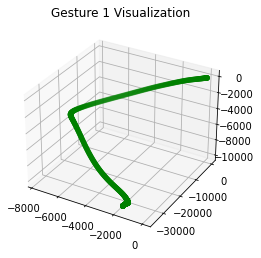

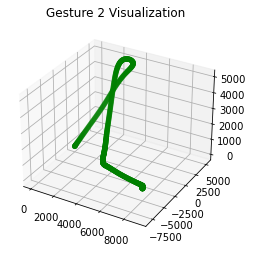

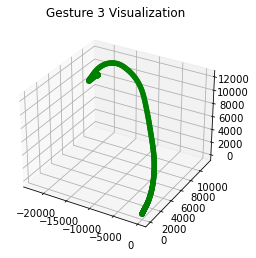

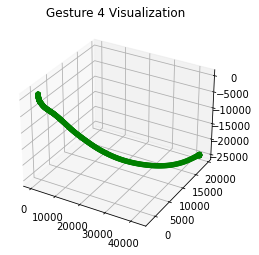

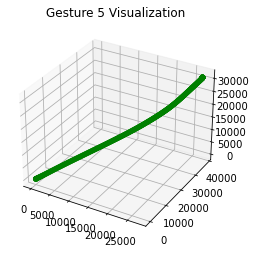

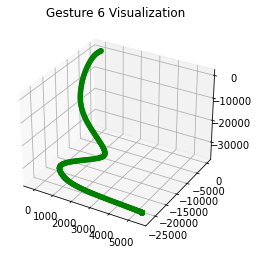

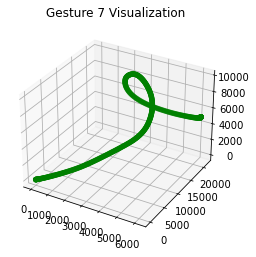

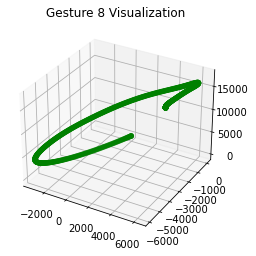

In [12]:
# VISUALIZATION OF GESTURES
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 


x = finalX[0][1]
y = finalY[0][1]
z = finalZ[0][1]

# Creating figure
fig = plt.figure(figsize = (4, 4))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("Gesture 1 Visualization")
 
# show plot
plt.show()

x = finalX[1][1]
y = finalY[1][1]
z = finalZ[1][1]

# Creating figure
fig = plt.figure(figsize = (4, 4))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("Gesture 2 Visualization")
 
# show plot
plt.show()

x = finalX[2][1]
y = finalY[2][1]
z = finalZ[2][1]

# Creating figure
fig = plt.figure(figsize = (4, 4))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("Gesture 3 Visualization")
 
# show plot
plt.show()

x = finalX[3][1]
y = finalY[3][1]
z = finalZ[3][1]

# Creating figure
fig = plt.figure(figsize = (4, 4))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("Gesture 4 Visualization")
 
# show plot
plt.show()

x = finalX[4][1]
y = finalY[4][1]
z = finalZ[4][1]

# Creating figure
fig = plt.figure(figsize = (4, 4))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("Gesture 5 Visualization")
 
# show plot
plt.show()

x = finalX[5][1]
y = finalY[5][1]
z = finalZ[5][1]

# Creating figure
fig = plt.figure(figsize = (4, 4))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("Gesture 6 Visualization")
 
# show plot
plt.show()

x = finalX[6][1]
y = finalY[6][1]
z = finalZ[6][1]

# Creating figure
fig = plt.figure(figsize = (4, 4))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("Gesture 7 Visualization")
 
# show plot
plt.show()

x = finalX[7][1]
y = finalY[7][1]
z = finalZ[7][1]

# Creating figure
fig = plt.figure(figsize = (4, 4))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("Gesture 8 Visualization")
 
# show plot
plt.show()



#### As it can be seen from the graphs above, visualized gestures from the data are similar to the ones that have been given.

### Part b)

In [13]:
dataX = open('uWaveGestureLibrary_X_TRAIN','r')
dataX = dataX.readlines()

listX =[]

for i in dataX:
    listX.append(i.split(' ')[2:])

len(listX[1])

Columns=[]
for i in range(0,563,1):
    c='t='+ str(i)
    Columns.append(c)
dfX = pd.DataFrame(listX, columns=Columns)


dfX.to_csv('testX.csv',index=False)
df = pd.read_csv('testX.csv')

for col in list(df.columns):
    df[col].fillna(0, inplace=True)

finalX = []


for row in df.itertuples():
    index = float(list(row)[:2][1])
    values = list(row)[2:-1]
    series1 = pd.Series(values)
#    cumsum1 = series1.cumsum()
#    cumsum2 = cumsum1.cumsum()
#    result = list(cumsum2)
    result = list(series1)
    finalX.append([index,result])

In [14]:
dataY = open('uWaveGestureLibrary_Y_TRAIN','r')
dataY = dataY.readlines()

listY =[]

for i in dataY:
    listY.append(i.split(' ')[2:])


Columns=[]
for i in range(0,562,1):
    c='t='+ str(i)
    Columns.append(c)
dfY = pd.DataFrame(listY, columns=Columns)


dfY.to_csv('testY.csv',index=False)
df = pd.read_csv('testY.csv')

for col in list(df.columns):
    df[col].fillna(0, inplace=True)

finalY = []


for row in df.itertuples():
    index = float(list(row)[:2][1])
    values = list(row)[2:]
    series1 = pd.Series(values)
#    cumsum1 = series1.cumsum()
#    cumsum2 = cumsum1.cumsum()
#    result = list(cumsum2)
    result = list(series1)
    finalY.append([index,result])

In [15]:
dataZ = open('uWaveGestureLibrary_Z_TRAIN','r')
dataZ = dataZ.readlines()

listZ =[]

for i in dataZ:
    listZ.append(i.split(' ')[2:])


Columns=[]
for i in range(0,568,1):
    c='t='+ str(i)
    Columns.append(c)
dfZ = pd.DataFrame(listZ, columns=Columns)


dfZ.to_csv('testZ.csv',index=False)
df = pd.read_csv('testZ.csv')

for col in list(df.columns):
    df[col].fillna(0, inplace=True)

finalZ = []


for row in df.itertuples():
    index = float(list(row)[:2][1])
    values = list(row)[2:-6]
    series1 = pd.Series(values)
#    cumsum1 = series1.cumsum()
#    cumsum2 = cumsum1.cumsum()
#    result = list(cumsum2)
    result = list(series1)
    finalZ.append([index,result])

In [16]:
conData = []
for line in range(561):
    temp = [finalX[line][0]] + finalX[line][1] + finalY[line][1] + finalZ[line][1]
    conData.append(temp)

#print(conData[0])   

In [17]:
#Columns=[]
#for i in range(0,1683,1):
#    c='t='+ str(i)
#    Columns.append(c)
#FinalMatrix = pd.DataFrame(conData, columns=Columns)
# FinalMatrix.head(-5)

Columns=[]
for i in range(0,1684,1):
    c='t='+ str(i)
    Columns.append(c)
    
    
FinalMatrix = pd.DataFrame(conData, columns=Columns)

df1 = FinalMatrix[FinalMatrix['t=0'] == 1.0]
df2 = FinalMatrix[FinalMatrix['t=0'] == 2.0]
df3 = FinalMatrix[FinalMatrix['t=0'] == 3.0]
df4 = FinalMatrix[FinalMatrix['t=0'] == 4.0]
df5 = FinalMatrix[FinalMatrix['t=0'] == 5.0]
df6 = FinalMatrix[FinalMatrix['t=0'] == 6.0]
df7 = FinalMatrix[FinalMatrix['t=0'] == 7.0]
df8 = FinalMatrix[FinalMatrix['t=0'] == 8.0]
df1.drop('t=0', axis=1, inplace=True)
df2.drop('t=0', axis=1, inplace=True)
df3.drop('t=0', axis=1, inplace=True)
df4.drop('t=0', axis=1, inplace=True)
df5.drop('t=0', axis=1, inplace=True)
df6.drop('t=0', axis=1, inplace=True)
df7.drop('t=0', axis=1, inplace=True)
df8.drop('t=0', axis=1, inplace=True)

#print(df1.head(5))


C:\Users\EnesSari\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(0.0, 0.3)

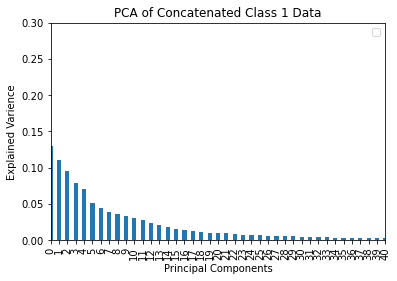

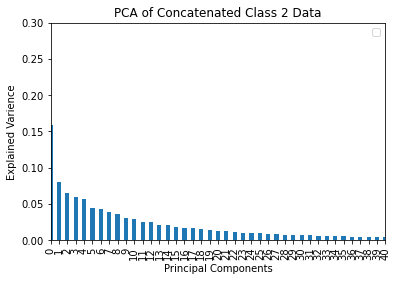

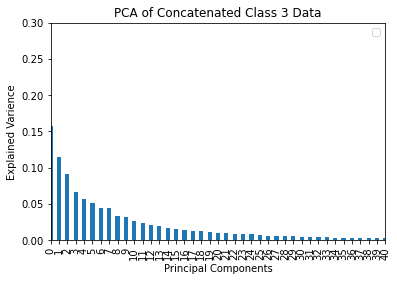

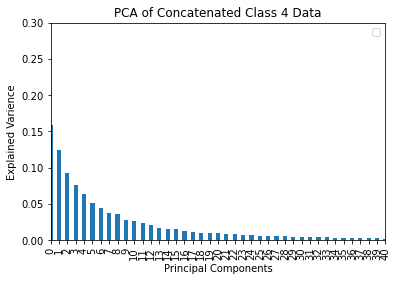

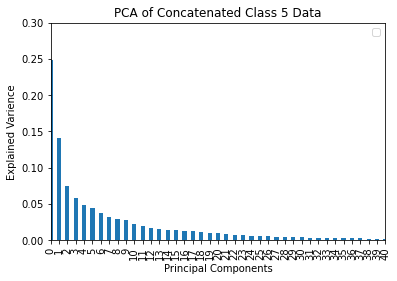

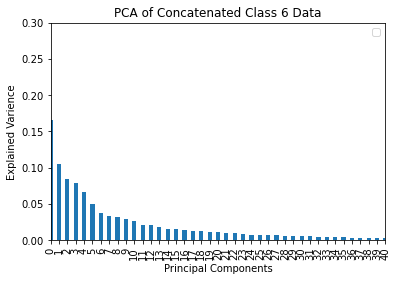

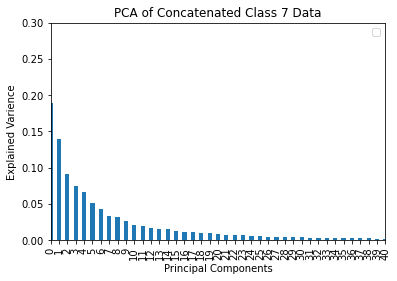

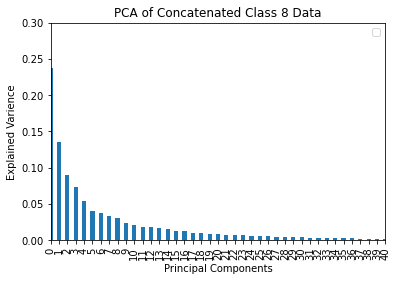

In [18]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
df1_pca = pd.DataFrame(pca.fit_transform(df1))


pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.title('PCA of Concatenated Class 1 Data')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience')
plt.xlim([0, 40])
plt.ylim([0, 0.3])

df2_pca = pd.DataFrame(pca.fit_transform(df2))


pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.title('PCA of Concatenated Class 2 Data')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience')
plt.xlim([0, 40])
plt.ylim([0, 0.3])


df3_pca = pd.DataFrame(pca.fit_transform(df3))


pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.title('PCA of Concatenated Class 3 Data')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience')
plt.xlim([0, 40])
plt.ylim([0, 0.3])


df4_pca = pd.DataFrame(pca.fit_transform(df4))


pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.title('PCA of Concatenated Class 4 Data')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience')
plt.xlim([0, 40])
plt.ylim([0, 0.3])


df5_pca = pd.DataFrame(pca.fit_transform(df5))


pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.title('PCA of Concatenated Class 5 Data')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience')
plt.xlim([0, 40])
plt.ylim([0, 0.3])


df6_pca = pd.DataFrame(pca.fit_transform(df6))


pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.title('PCA of Concatenated Class 6 Data')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience')
plt.xlim([0, 40])
plt.ylim([0, 0.3])



df7_pca = pd.DataFrame(pca.fit_transform(df7))


pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.title('PCA of Concatenated Class 7 Data')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience')
plt.xlim([0, 40])
plt.ylim([0, 0.3])


df8_pca = pd.DataFrame(pca.fit_transform(df8))


pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.title('PCA of Concatenated Class 8 Data')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience')
plt.xlim([0, 40])
plt.ylim([0, 0.3])

#### As it can be seen from the graphs above, the first two components recover nearly, 
24% of the variability for Class 1.<br>
23% of the variability for Class 2.<br>
26% of the variability for Class 3.<br>
27% of the variability for Class 4.<br>
39% of the variability for Class 5.<br>
26% of the variability for Class 6.<br>
34% of the variability for Class 7.<br>
38% of the variability for Class 8.<br>